# Multiple Linear Regression: Home Characteristics that have the Biggest Impact on Home Price

## Table of Contents
* [Part 1 - Research Question](#Part1)
* [Part 2 - Data Collection](#Part2)
* [Part 3 - Data Extraction & Preparation](#Part3)
* [Part 4 - Analysis](#Part4)
* [Part 5 - Data Summary and Implications](#Part5)

### Part 1 - Research Question <a class="anchor" id="Part1"></a>

Can multiple linear regression accurately determine which home characteristics have the largest impact on home sales price and can this MLR model be optimized by using PCA?

The goal of this project is to determine if a multiple linear regression model can accurately analyze which factors are most influential on home sales price and to determine if principal component analysis is a good tool to use with the dataset in optimizing the model. 

This analysis will be beneficial for real estate agents as well as large and small real estate companies to help them ensure that they are buying or selling a house at the best price. Understanding what characteristics control house prices will give these entities an upper hand in the housing market by ensuring that they have the best understanding, allowing them to act in the best interest of themselves and their clients.

**Null hypothesis** - A predictive Multiple Linear Regression model cannot be made from the dataset to determine which characteristic impact home sales price.	<br>		

**Alternate Hypothesis** - A predictive Multiple Linear Regression model can be constructed and accurately determine which home characteristics impact home sales price with a model accuracy > 65%.

It is hypothesized that there is a relationship between home sales price and the characteristics of the home. Because many homes share similar characteristics, the model will be able to use the home data from the dataset to look for trends and patterns which will lead to better understanding of which characteristics have a higher weight in determining home sales price. In this way it can determine which charateristics in a home have the most impact on the home's price and produce results showing what factors are most influencial.

### Part 2 - Data Collection <a class="anchor" id="Part2"></a>

The data for this project was collected from an open source dataset on Kaggle. The dataset has a COO: Public Domain tag which means the data is allowed to be shared and used freely for data analysis projects. The dataset contains real estate data from Kansas City from the beginning of 2014 to the end of 2015. There is a total of 21,613 rows in the dataset which provides a good amount of data for training the model. This amount of data will help the model to see the trends and patterns in the data and provide accurate results. The dataset contains individual house characteristics along with the home price which will give the model the data that it needs to weigh the home characteristics and determine which features have the strongest relationship and impact on home price.

**The following columns from the dataset will be used:**

**price** - Price of each home sold. <br>
**bedrooms** - Number of bedrooms. <br>
**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower. <br>
**sqft_living** - Square footage of the apartment interior living space. <br>
**sqft_lot** - Square footage of the land space. <br>
**floors** - Number of floors. <br>
**waterfront** - A variable for whether the apartment was overlooking the waterfront or not. 1 means the home is on the waterfront and 0 means it was not on the waterfront. <br>
**view** - An index from 0 to 4 of how good the view is from the property. <br>
**condition** - An index from 1 to 5 on the condition of the apartment. <br>
**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design. <br>
**sqft_above** - The square footage of the interior housing space that is above ground level. <br>
**sqft_basement** - The square footage of the interior housing space that is below ground level. <br>
**yr_built** - The year the house was initially built. <br>
**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors <br>
**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

One advantage of using Kaggle to find a dataset for my project is that the website contains a large amount of open source datasets that can be used for data analysis. The dataset described above was easy to find and had characteristics that would make it easy to create a multiple linear regression model to determine which features have the biggest impact on a home's sales price. One disadvantage of this dataset is that it contains outdated data. The data is a two year span from the beginning of 2014 to the end of 2015, so any results that are produced will be reflective of that period rather than today. This setback can be overcome however by creating the model and using this code as a base for future models. Eventhough the data is outdated once an updated dataset is found it can be read into the model and, since the code is already prepared, the model can be easily updated with the current housing market data thereby producing results that are relevant to today.

### Part 3 - Data Extraction & Preparation <a class="anchor" id="Part3"></a>

All code for this project was done in this Jupyter Notebook. The below code shows the steps taken for data extraction and preparation. Inline code comments are included in the code blocks to shed more light on the data extraction and preparation processes along with small comments in the notebook to give more detail on insights that were found while going through the project.

### Read in the CSV File & Import Libraries

Many tools and techniques are used in this section to prepare the data. The pandas library is used to load the data into the Jupyter environment so that it can be manipulated and analyzed. The pandas library was a simple choice for reading in the csv file because it contains the read_csv method which makes reading csv files into the environment fast and easy.

The pandas library was the best tool to use for this step and there are no disadvantages to using it.

In [1]:
#Import all necessary libraries for the project

#Import pandas to work with the dataset
import pandas as pd

#Import numpy to work with arrays
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as py

#Import sklearn to perform model preprocessing, creation, and evaluation (for linear regression and PCA)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Import Stats models for building the linear regression model and qqplot
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

#Import Scipy for mathmatical computations
import scipy.stats as stats
from scipy.stats import norm, uniform

The data extraction process is started in the step below. The data is gathered and extracted from the csv document into the Jupyter Notebook environment so that analysis can be completed on it. In this step, the pandas library is used to read the csv document and load the data into the environment.

In [2]:
#load housing dataset
df = pd.read_csv("C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D214/Linear Regression Home Price Capstone/kc_final.csv")

df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 22)

### Clean the Data

An important step in creating an accurate MLR model is to ensure that the data has been cleaned and prepared before analysis. The following steps are those taken to clean the data by filling in missing values, removing duplicate values, and fixing any outliers that may be present in the data.

For this section, the pandas library was a tool used to clean the data. In this dataset there were no outliers, missing values, or duplicate values but there was still a check performed on the data to confirm this. The pandas isnull() method was used to check for missing values and the pandas duplicated() method was used to check for duplicates. Outliers were detected by creating histogram charts by using the matplotlib library. 

There are no disadvantages to any of the tools used for the cleaning process. The pandas library contains many great methods for analyzing a dataset, therefore it was the best option and best tool for this process.

In [4]:
#Clean the data. Look for missing values, duplicates, and outliers
#Check for missing values

df.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The above check shows that there are no missing values in the dataset.

In [5]:
#check for duplicate values
df.duplicated().value_counts()

False    21613
Name: count, dtype: int64

The above check shows that there are no duplicate values in the dataset. There are 21,613 unique rows.

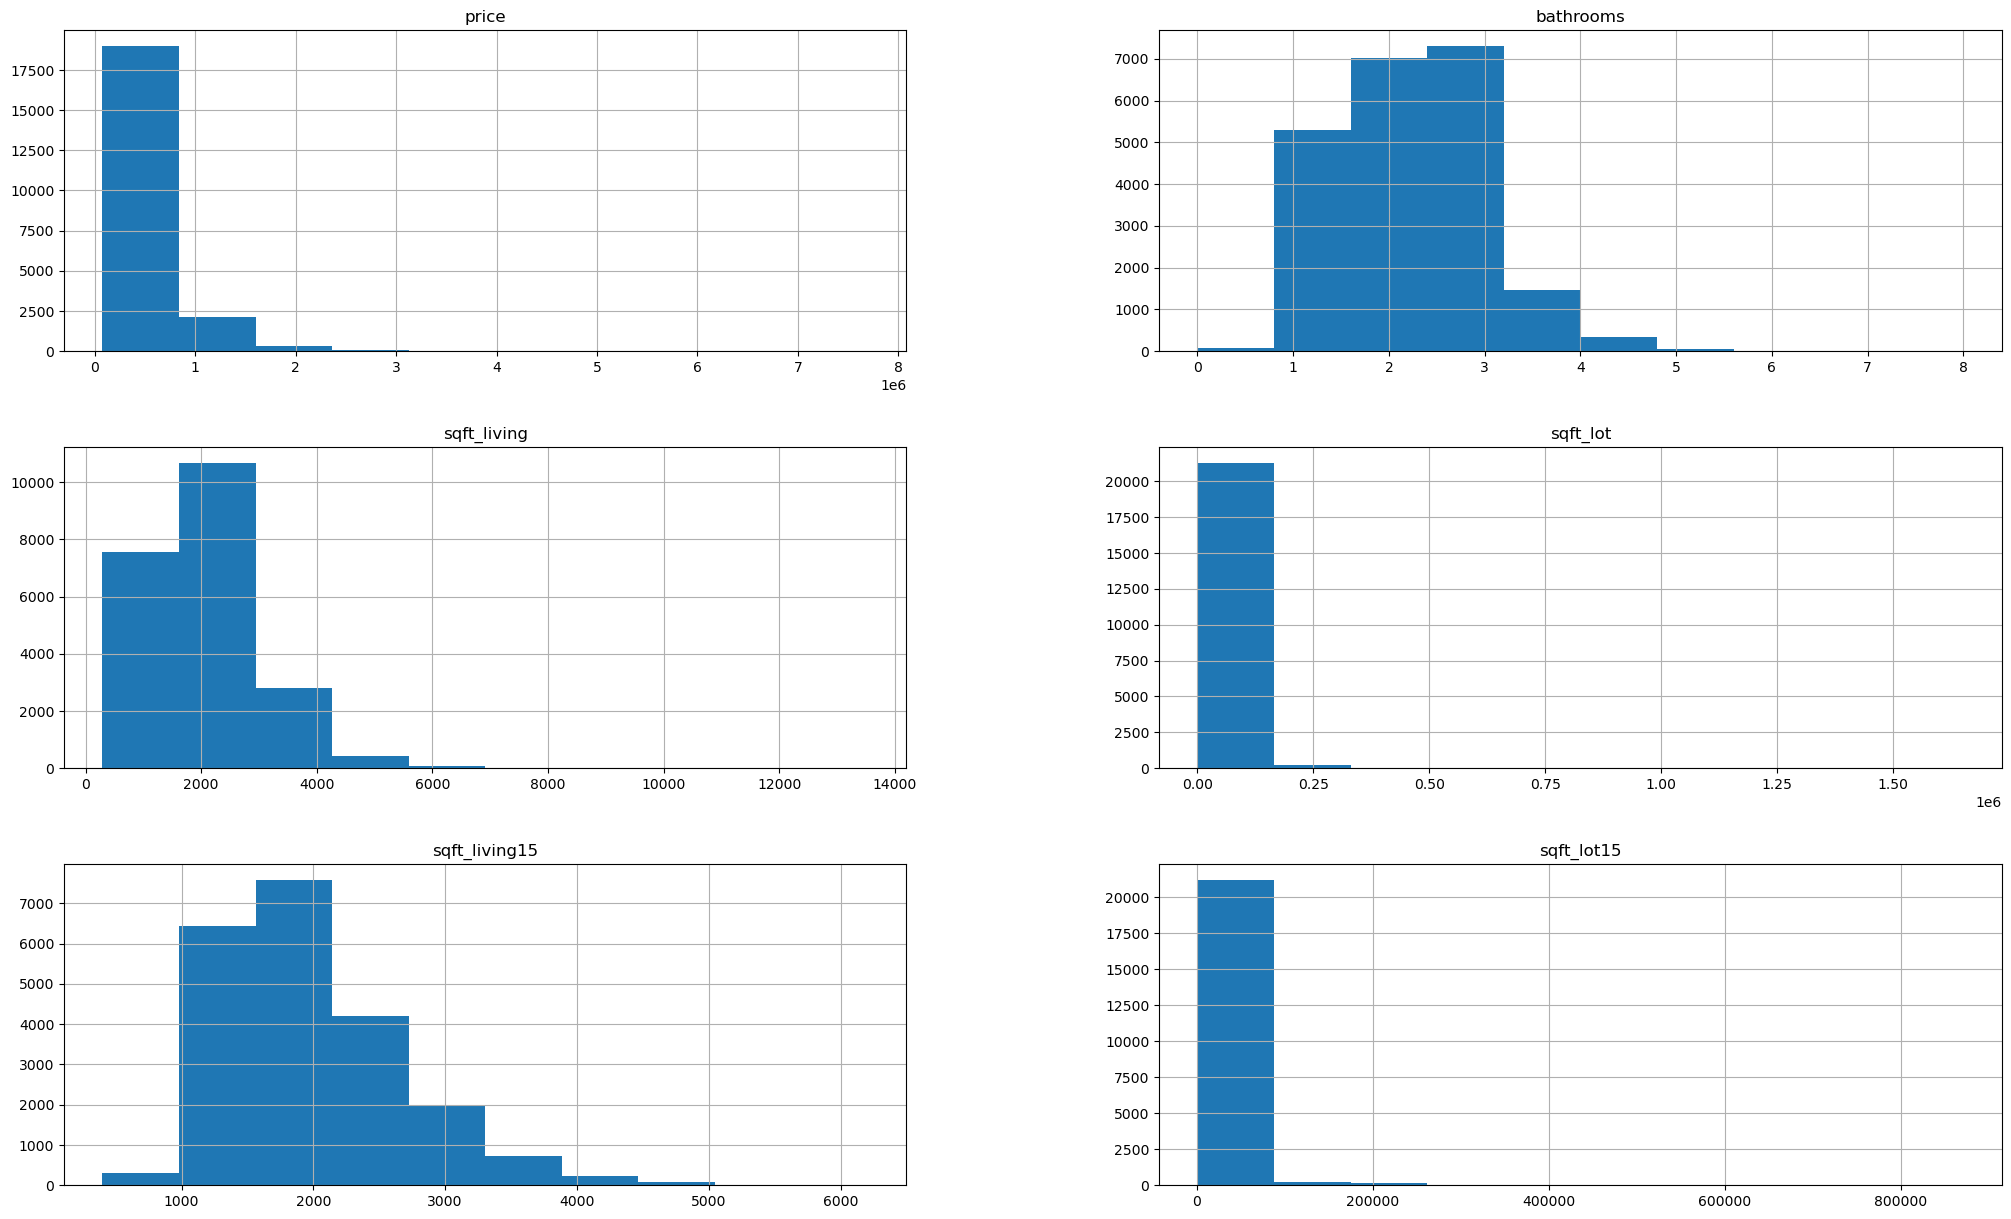

In [6]:
#Check the dataset for outliers in the continuous variables
df[['price','bathrooms','sqft_living','sqft_lot','sqft_living15','sqft_lot15']].hist(figsize=(25,15))
plt.show();

There don't appear to be any outliers present in the data based off of the histogram charts.

In the histogram charts above it can be seen that some of the continuous variables do not have normal distribution. To test this, probability plots were created to determine normal distribution. If the continuous variable does not have normal distribution, logarithmic transformation will be applied to normalize the feature. This normalization can increase the accuracy of the Multiple Linear Regression model.

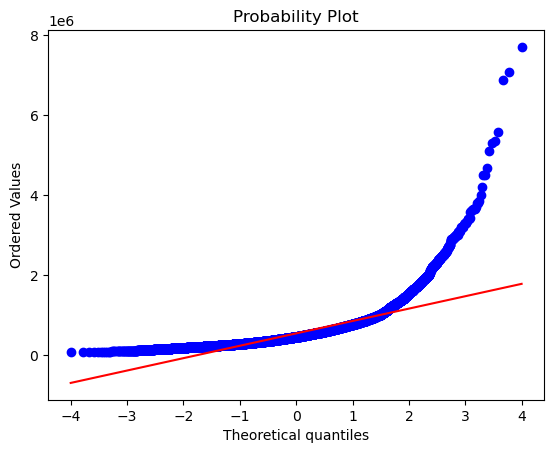

In [7]:
#Probability plot to check normality of price (Deepanshi, 2022).
stats.probplot(df.price, plot=py);

The price variable is not showing very normal distribution, so logarithmic transformation will be used to normalize the data and prepare it for analysis.

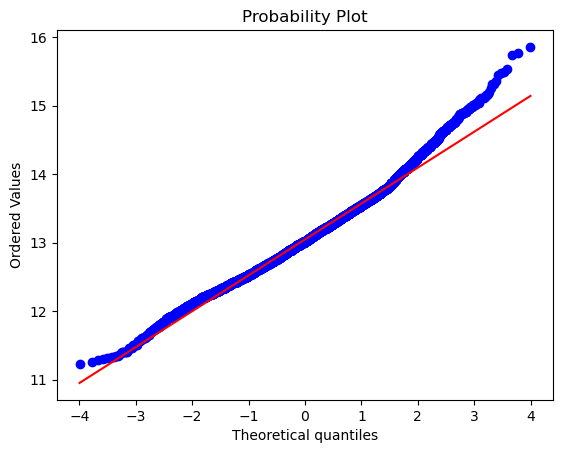

In [8]:
#performing logarithmic transformation on the feature to normalize the data
df['price']=np.log(df['price'])

stats.probplot(df.price, plot=py);

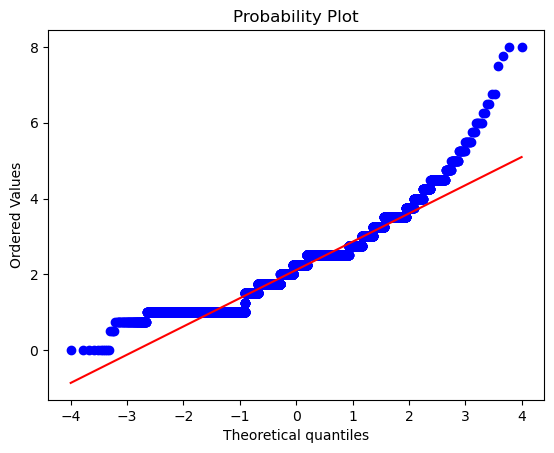

In [9]:
#Probability plot to check normality of bathrooms
stats.probplot(df.bathrooms, plot=py);

The bathrooms variable data is looking relatively normailzed so no action will be taken. Any action to normalize this variable will result in an error because the column numbers don't allow logarithmic transformation. This variable will be left as is for the analysis.

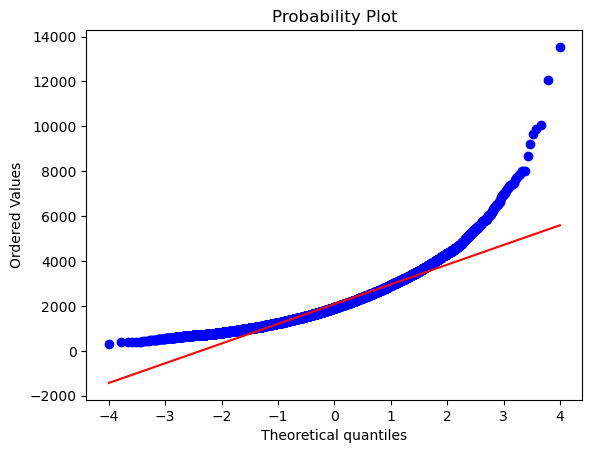

In [10]:
#Probability plot to check normality in sqft_living
stats.probplot(df.sqft_living, plot=py);

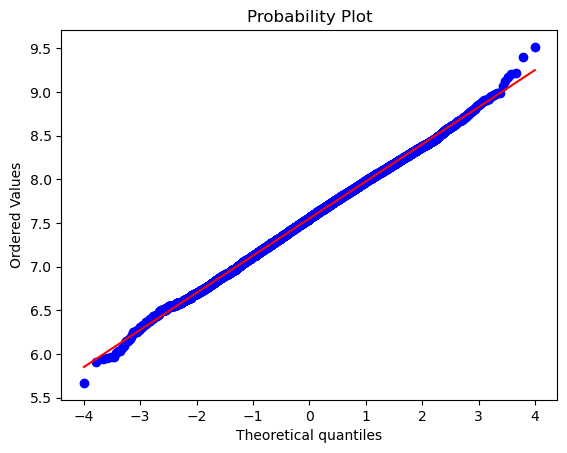

In [11]:
#performing logarithmic transformation on the feature to normalize the data
df['sqft_living']=np.log(df['sqft_living'])

stats.probplot(df.sqft_living, plot=py);

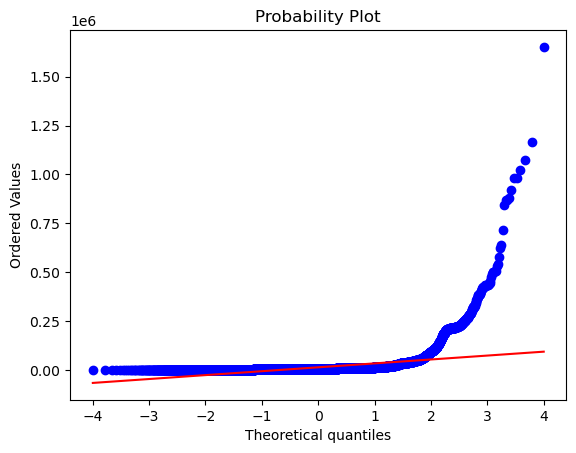

In [12]:
#Probability plot to check normality in sqft_lot
stats.probplot(df.sqft_lot, plot=py);

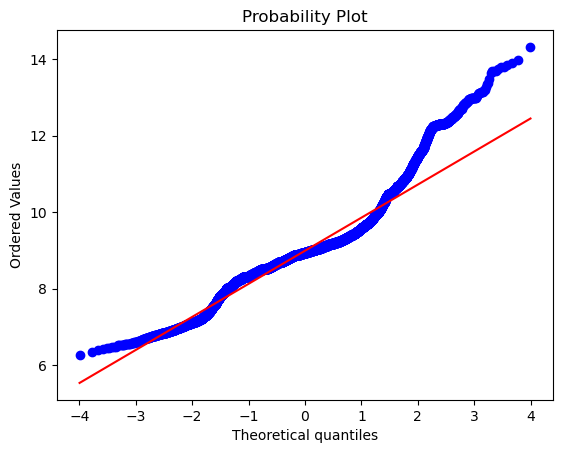

In [13]:
#performing logarithmic transformation on the feature to normalize the data
df['sqft_lot']=np.log(df['sqft_lot'])

stats.probplot(df.sqft_lot, plot=py);

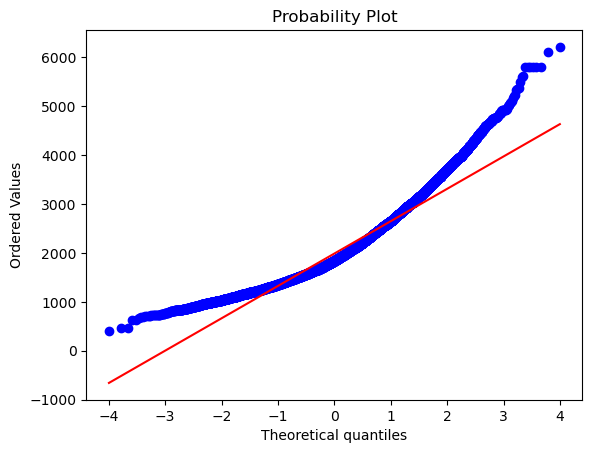

In [14]:
#Probability plot to check normality in sqft_living15
stats.probplot(df.sqft_living15, plot=py);

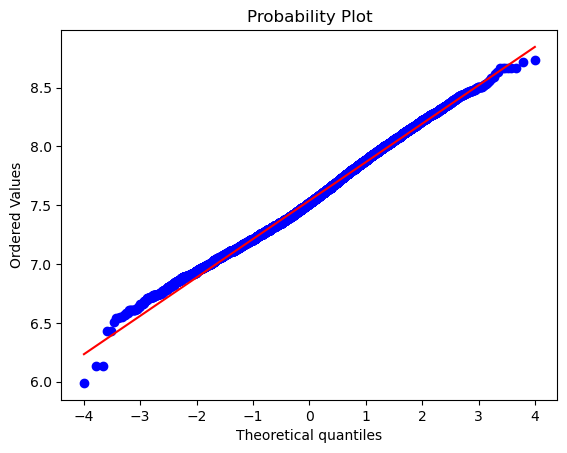

In [15]:
#performing logarithmic transformation on the feature to normalize the data
df['sqft_living15']=np.log(df['sqft_living15'])

stats.probplot(df.sqft_living15, plot=py);

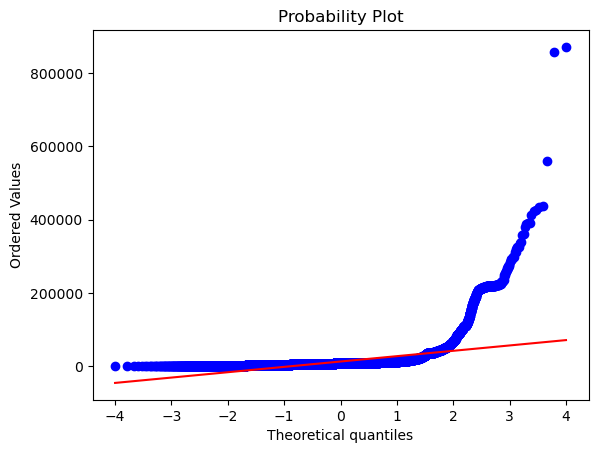

In [16]:
#Probability plot to check normality in sqft_lot15
stats.probplot(df.sqft_lot15, plot=py);

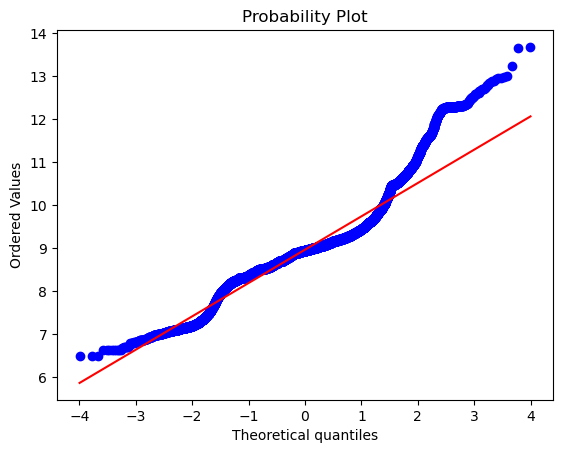

In [17]:
#performing logarithmic transformation on the feature to normalize the data
df['sqft_lot15']=np.log(df['sqft_lot15'])

stats.probplot(df.sqft_lot15, plot=py);

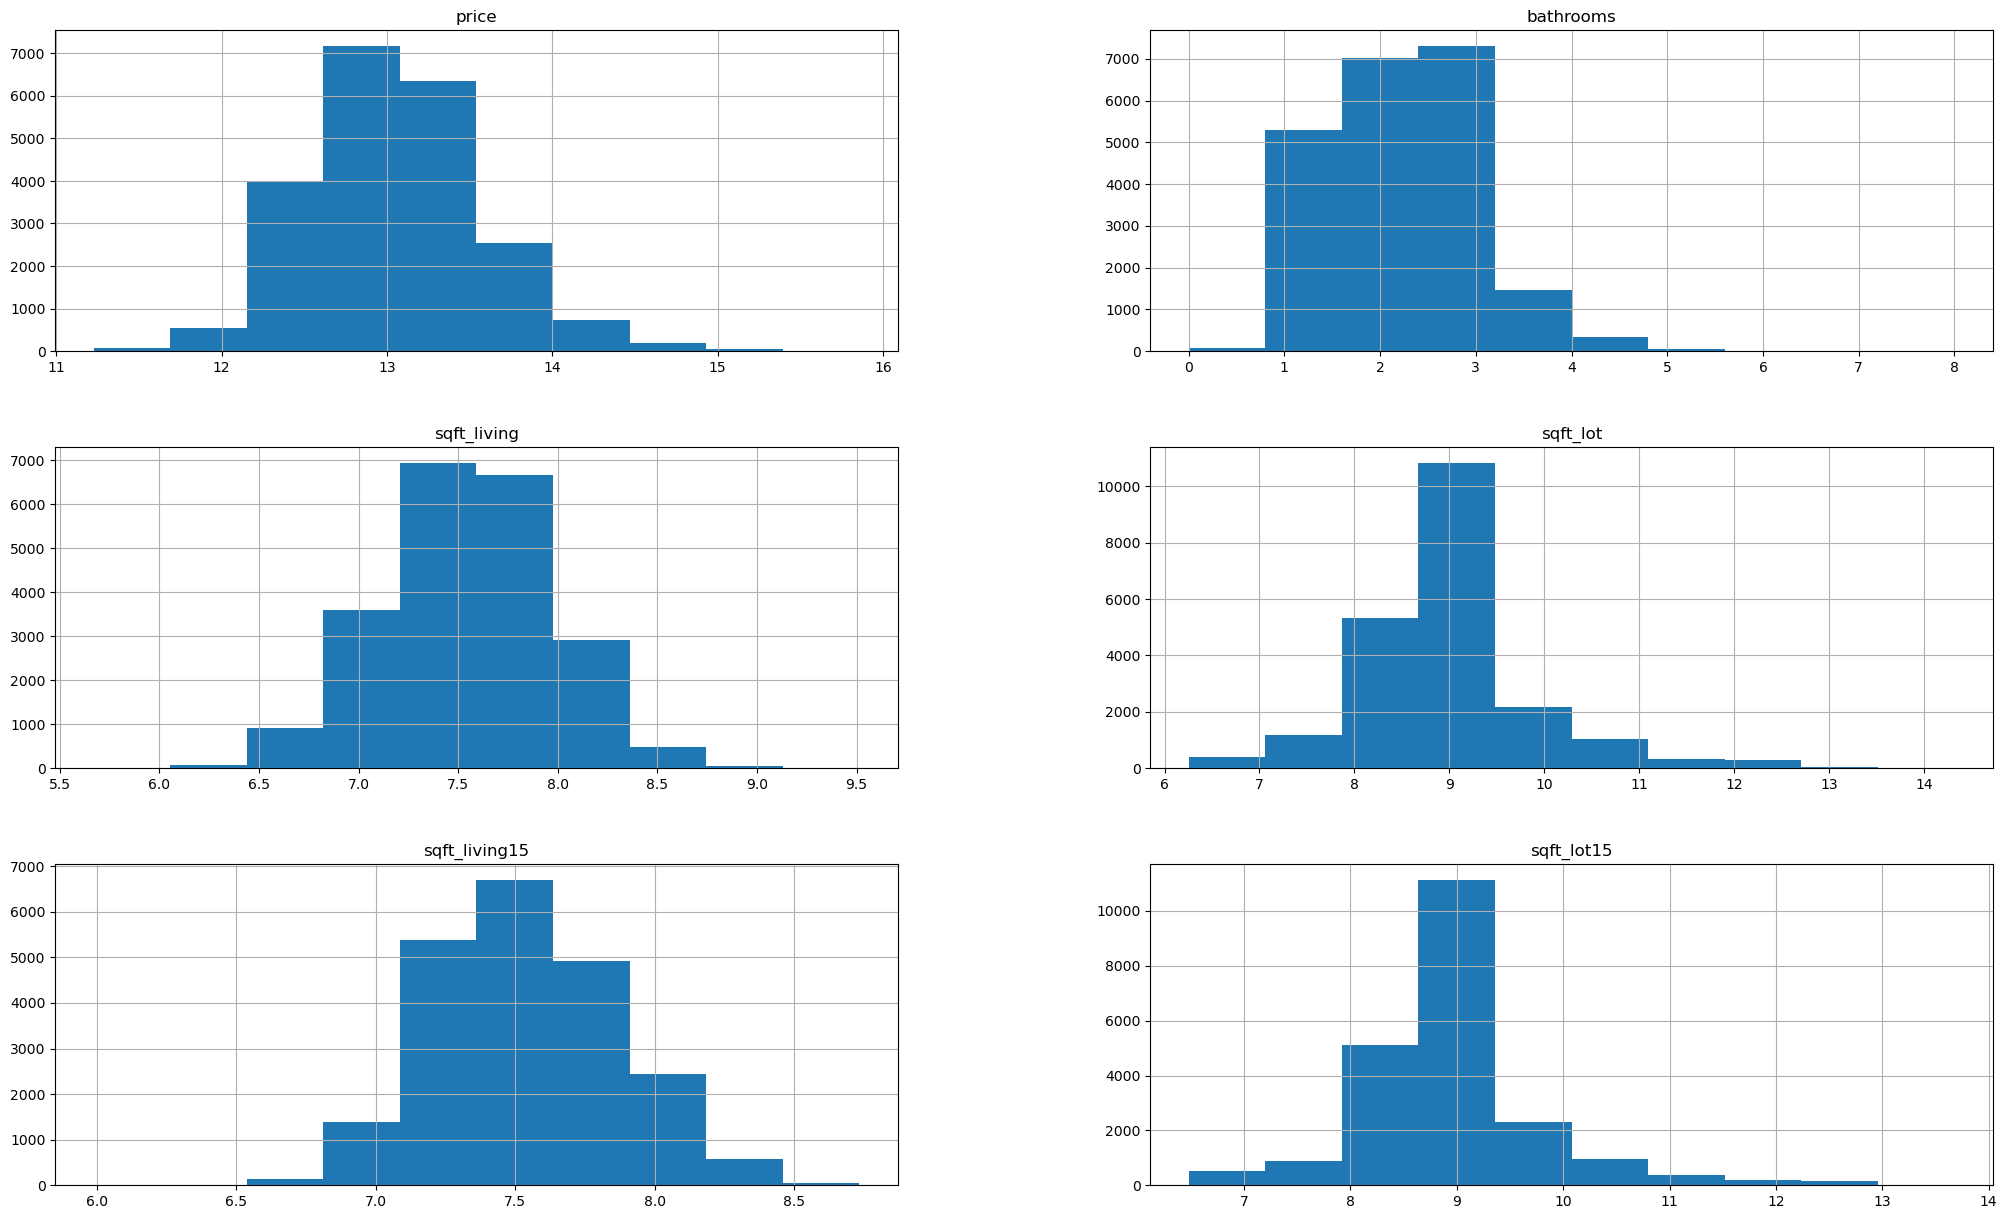

In [18]:
#plot histogram charts again to check distribution after normalization
df[['price','bathrooms','sqft_living','sqft_lot','sqft_living15','sqft_lot15']].hist(figsize=(25,15))
plt.show();

Not all of the variables from the original dataset will be used in the analysis. The above step removes the unnecessary columns from the dataframe and leaves only those that will be used.

In [19]:
#Reduce the dataset to only the variables that will be used for analysis
df = df.drop(['id','date','lat','long','yr_renovated','Unnamed: 0','zipcode'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,12.309982,3,1.00,7.073270,8.639411,1.0,0,0,3,7,1180,0,1955,7.200425,8.639411
1,13.195614,3,2.25,7.851661,8.887653,2.0,0,0,3,7,2170,400,1951,7.432484,8.941022
2,12.100712,2,1.00,6.646391,9.210340,1.0,0,0,3,6,770,0,1933,7.908387,8.994917
3,13.311329,4,3.00,7.580700,8.517193,1.0,0,0,5,7,1050,910,1965,7.215240,8.517193
4,13.142166,3,2.00,7.426549,8.997147,1.0,0,0,3,8,1680,0,1987,7.495542,8.923058


### Exploratory Data Analysis

The next step in preparing the data is to perform exploratory data analysis. EDA is important because it allows the analyst to begin understanding the data better before making any assumptions for the project. It is an opportunity to better understand the shape of the dataset, common values in the dataset, datatypes that are found, and do some statistical analysis before moving forward with the project.

The tools used to perform EDA are the same tools used for the steps above. The pandas library was once again used because it contains great tools for analyzing datasets. The tools from pandas that were used below were the shape attribute to better understand the shape of the dataset, the describe method to perform some statistical analysis on the dataframe, and the info method to better understand the variables and their datatypes. There were no disadvantages to using these attributes and methods to examine the dataframe.

In [20]:
#Perform exploratory data analysis to better understand the data and prepare for linear regression analysis
df.shape

(21613, 15)

In [21]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,13.047817,3.370842,2.114757,7.550335,8.989956,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,7.539440,8.960984
std,0.526685,0.930062,0.770163,0.424807,0.902425,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,0.327515,0.813048
min,11.225243,0.000000,0.000000,5.669881,6.253829,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,5.988961,6.478510
25%,12.682152,3.000000,1.750000,7.263330,8.525161,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,7.306531,8.536996
50%,13.017003,3.000000,2.250000,7.554859,8.938269,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,7.517521,8.938532
75%,13.377006,4.000000,2.500000,7.843849,9.276877,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,7.766417,9.218606
max,15.856731,33.000000,8.000000,9.513404,14.317109,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,8.733916,13.677627


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  float64
 4   sqft_lot       21613 non-null  float64
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  sqft_living15  21613 non-null  float64
 14  sqft_lot15     21613 non-null  float64
dtypes: float64(7), int64(8)
memory usage: 2.5 MB


In [23]:
#Determine max, min, and average home price
max_price = df['price'].max()
print("Maximum house price:",max_price)

min_price = df['price'].min()
print("Minimum house price:",min_price)

av_price = df['price'].mean()
print("Average house price:",min_price)

Maximum house price: 15.856730886823913
Minimum house price: 11.225243392518447
Average house price: 11.225243392518447


### Bivariate Visualizations and Correlation Matrix

This section is dedicated to understanding the relationship between the target variable and the predictor variables that will be used in the analysis. The scatter plots provide a simple visualization that allows for quick intake and understanding of the relationships in the data while the correlation matrix allows for visibility into the relationships and multicollinearity of the data.

The below scatter plots give good insight into the relationship between the target variable and the predictor variabless. The advantage to using scatter plots is that they are easy to understand and relationships can be easily seen. For this project, since all of the variables were already numeric, a scatter plot was the best option for visualizing the relationship between variables. If there had been categorical data a scatter plot would not have been able to be used and would have been a bad plot to determine the relationship between variables. Since the dataset did not contain categorical data, this was not the case and the bivariate scatter plot graphs are an advantage rather than a disadvantage.

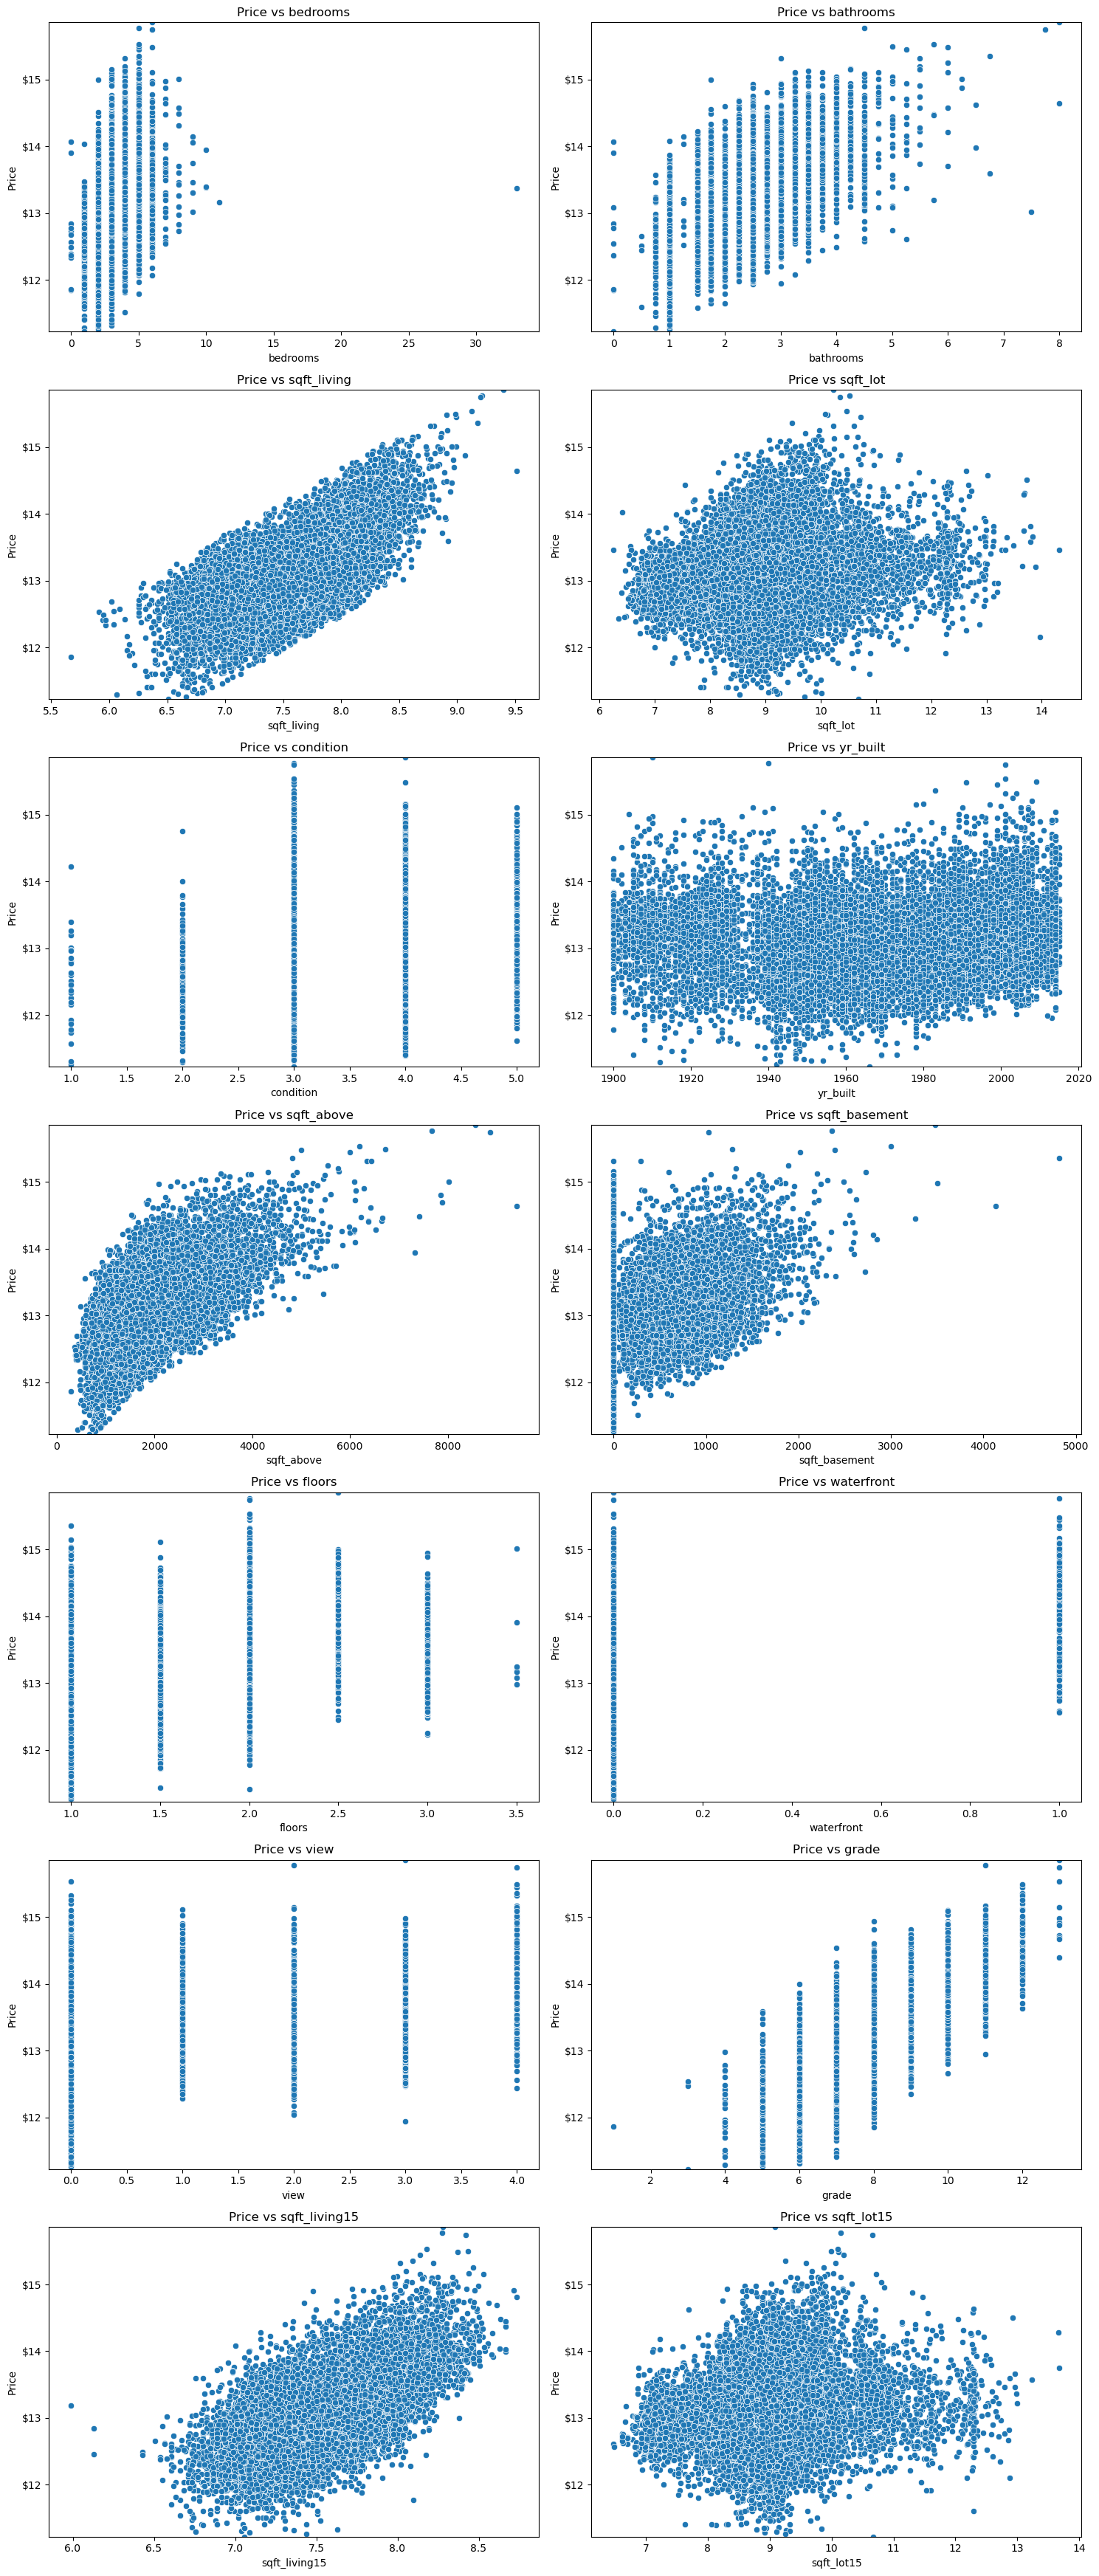

In [24]:
#Create bivariate visualizations to better understand the relationship between the dependent variable and independent variables

# Select relevant features for plotting
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','condition','yr_built','sqft_above','sqft_basement','floors',
           'waterfront','view','grade','sqft_living15','sqft_lot15']
target = 'price'

# Number of rows and columns for subplots
num_features = len(features)
ncols = 2
nrows = (num_features + 1) // ncols

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
axs = axs.flatten()

# Plot scatter plots for each feature
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df[target], ax=axs[i])
    axs[i].set_title(f'Price vs {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Price')
    axs[i].set_ylim(df[target].min(), df[target].max())  # Set y-axis scale to exact range of the target variable
    # Set y-axis to use the actual price values
    axs[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()

plt.show()

The variables in this dataset were all numerical, so there is no need to preform one hot encoding on the data.

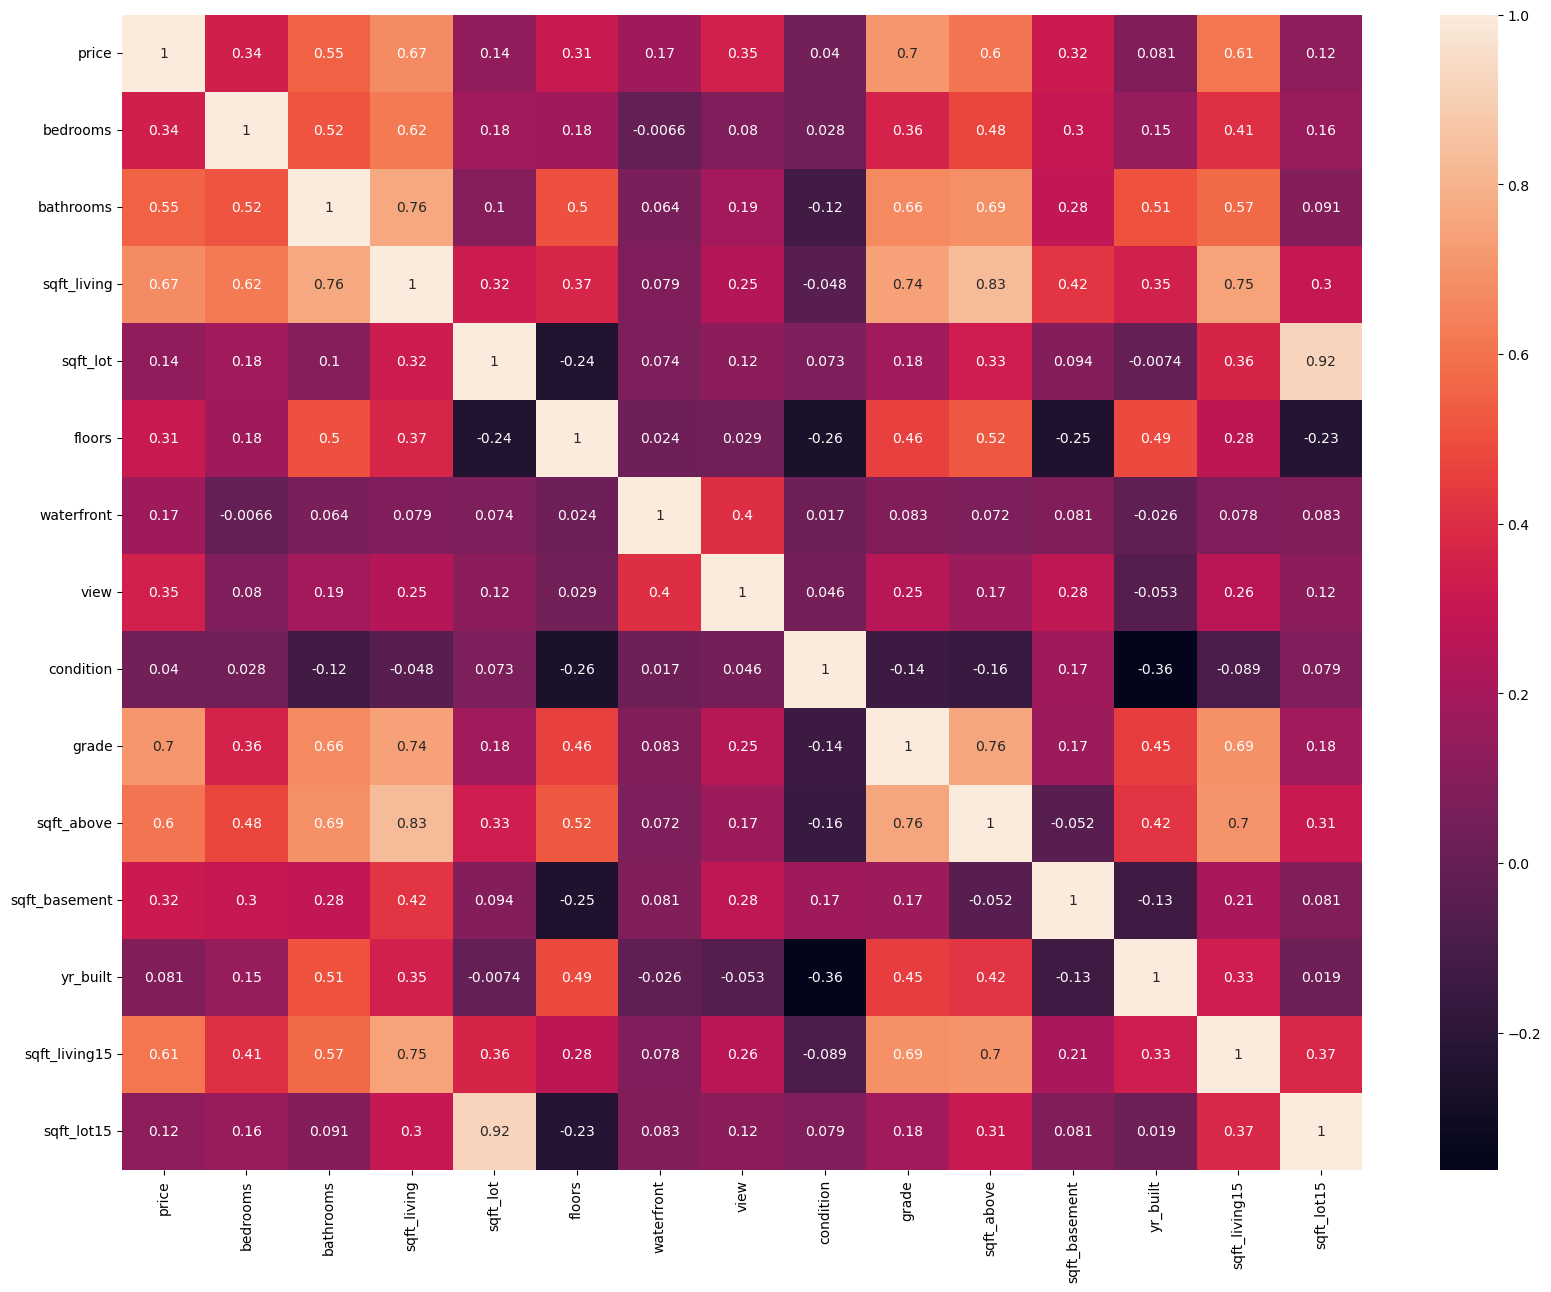

In [25]:
#Create a correlation matrix for the data to look for relationships and multicolinearity
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(), annot=True);

In the correlation matrix above one can see that price is highly correlated with the square feet of a home. This is expected based on the scatter plot above. It can also be seen that there is collinearity between many of the predictor variables which may cause issues with the analysis later in the process. PCA will be applied to the dataset later in the project which will remove the multicollinearity, but in doing this it may also remove important information necessary for the model to run well. This test will be performed later in the project too determine if PCA is a good tool to use for this dataset. 

### Data Standardization

Within the dataset there are many different kinds of data, all of which are scaled differently. For the model to run optimally, the data needs to be standardized so that all of the features are on the same scale. This will remove some unstablility from the model and optimize the results.

The final step of the preparation process is to standardize the data and ensure that each variable is on the same scale. The tools used to perform standardization were from the sklearn library. The StandardScaler method was used to standardize this model. The advantage of using StandardScaler is that standardizing the data in this way enhances the model's performance and helps to keep it more stable and accurate. A disadvantage of StandardScaler comes when there are outliers in data. When there are outliers, StandardScaler cannot guarantee balanced scaling which produces which produces errors in the model. As seen above, the data from this dataset did not contain outliers, so this should not be an issue with our model.

In [26]:
#Create a scaler object and Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

scaled_df

array([[-1.40093709, -0.39873715, -1.44746357, ..., -0.54489777,
        -1.03513967, -0.39552412],
       [ 0.28062405, -0.39873715,  0.1756067 , ..., -0.6810785 ,
        -0.32657785, -0.02455203],
       [-1.79828088, -1.47395936, -1.44746357, ..., -1.29389179,
         1.12653133,  0.04173705],
       ...,
       [-0.27219645, -1.47395936, -1.77207762, ...,  1.29354209,
        -1.86830363, -1.66855887],
       [-0.28214334, -0.39873715,  0.50022075, ...,  1.12331618,
        -0.87966177, -2.21506707],
       [-0.67639105, -1.47395936, -1.77207762, ...,  1.25949691,
        -1.86830363, -2.14992494]])

In [27]:
#Transform scaled array data back to dataframe
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)
scaled_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,-1.400937,-0.398737,-1.447464,-1.123042,-0.388457,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-1.035140,-0.395524
1,0.280624,-0.398737,0.175607,0.709342,-0.113368,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,-0.326578,-0.024552
2,-1.798281,-1.473959,-1.447464,-2.127944,0.244219,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,1.126531,0.041737
3,0.500335,0.676485,1.149449,0.071481,-0.523893,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.989904,-0.545848
4,0.179142,-0.398737,-0.149007,-0.291399,0.007969,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.134038,-0.046647


In [28]:
#Check mean and std to ensure data is accurately scaled
scaled_df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.46,-3.62,-2.75,-4.43,-3.03,-0.92,-0.09,-0.31,-3.70,-5.66,-1.81,-0.66,-2.42,-4.73,-3.05
25%,-0.69,-0.40,-0.47,-0.68,-0.52,-0.92,-0.09,-0.31,-0.63,-0.56,-0.72,-0.66,-0.68,-0.71,-0.52
50%,-0.06,-0.40,0.18,0.01,-0.06,0.01,-0.09,-0.31,-0.63,-0.56,-0.28,-0.66,0.14,-0.07,-0.03
75%,0.63,0.68,0.50,0.69,0.32,0.94,-0.09,-0.31,0.91,0.29,0.51,0.61,0.88,0.69,0.32
max,5.33,31.86,7.64,4.62,5.90,3.71,11.47,4.91,2.44,4.55,9.20,10.23,1.50,3.65,5.80


The data is properly scaled because the mean of each column is zero and the standard deviation of each column is 1. 

### Part 4 - Analysis <a class="anchor" id="Part4"></a>

For this project, two separate multiple linear regression models were created. One regression model was created immediately after standardization and the x and y variables defined and split into training and test sets. This initial model will give results based on the data preparation and standardization, but without any further dimensionality reduction. This model will be used to determine which variables have the greatest impact on home price and to get the baseline R-Squared, Adjusted R-Squared, and Mean Squared Error numbers that will be compared later to the principal component regression model. The initial model was created using OLS. This model type was chosen for its simplicity, flexibility, and scalability which will be beneficial when future housing data is added to the model. One drawback of using an OLS model is that it struggles when dealing with nonlinear relationships between variables. As seen before, there is strong multicollinearity in the data which may cause issues with the OLS model.

After the initial regression model, principal component analysis was applied to the X training and test sets. A Kaiser Method scree plot was created to determine the optimal principal components for the model and a new heat map was created to visualize the multicollinearity after performing PCA. PCA could be a huge advantage for the data or a huge drawback. The advantage of using PCA on this dataset is that it can reduce some of the multicollinearity that was seen above in the correlation matrix by reducing the data's dimensionality. This dimensionality reduction could also be a disadvantage though. If the PCA removes important data that the model needs to learn and interpret the data, then the dimensionality reduction of PCA can cause the model to be less accurate and have a poorer fit.

The final step of the analysis was to create an updated linear regression model using the PCA components to determine the R-Squared, Adjusted R-Squared, and Mean Squared Error values. These values were compared to the initial model values to determine if the PCA model runs more optimally than the initial model.

### Initial Linear Regression Model

In [29]:
#Split the data into x and y variables
X = pd.DataFrame(scaled_df[['bedrooms','bathrooms','sqft_living','sqft_lot','condition','yr_built','sqft_above','sqft_basement','floors',
           'waterfront','view','grade','sqft_living15','sqft_lot15']].assign(Intercept=1))
X.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,yr_built,sqft_above,sqft_basement,floors,waterfront,view,grade,sqft_living15,sqft_lot15,Intercept
0,-0.398737,-1.447464,-1.123042,-0.388457,-0.629187,-0.544898,-0.734708,-0.658681,-0.915427,-0.087173,-0.305759,-0.558836,-1.035140,-0.395524,1
1,-0.398737,0.175607,0.709342,-0.113368,-0.629187,-0.681079,0.460841,0.245141,0.936506,-0.087173,-0.305759,-0.558836,-0.326578,-0.024552,1
2,-1.473959,-1.447464,-2.127944,0.244219,-0.629187,-1.293892,-1.229834,-0.658681,-0.915427,-0.087173,-0.305759,-1.409587,1.126531,0.041737,1
3,0.676485,1.149449,0.071481,-0.523893,2.444294,-0.204446,-0.891699,1.397515,-0.915427,-0.087173,-0.305759,-0.558836,-0.989904,-0.545848,1
4,-0.398737,-0.149007,-0.291399,0.007969,-0.629187,0.544548,-0.130895,-0.658681,-0.915427,-0.087173,-0.305759,0.291916,-0.134038,-0.046647,1
5,0.676485,3.097133,2.465922,2.817014,-0.629187,1.021181,2.537955,2.798440,-0.915427,-0.087173,-0.305759,2.844170,2.835246,3.162319,1
6,-0.398737,0.175607,-0.242860,-0.180061,-0.629187,0.816910,-0.088628,-0.658681,0.936506,-0.087173,-0.305759,-0.558836,0.530974,-0.164220,1
7,-0.398737,-0.798235,-1.375505,0.211722,-0.629187,-0.272536,-0.879623,-0.658681,-0.915427,-0.087173,-0.305759,-0.558836,-0.399716,0.270631,1
8,-0.398737,-1.447464,-0.155288,-0.079018,-0.629187,-0.374672,-0.891699,0.990795,-0.915427,-0.087173,-0.305759,-0.558836,-0.168154,0.049493,1
9,-0.398737,0.500221,-0.014131,-0.222971,-0.629187,1.089271,0.122706,-0.658681,0.936506,-0.087173,-0.305759,-0.558836,0.731613,-0.035712,1


In [30]:
y = pd.DataFrame(scaled_df[['price']])
y.head(10)

,price
0,-1.400937
1,0.280624
2,-1.798281
3,0.500335
4,0.179142
5,1.842957
6,-1.118422
7,-0.880665
8,-1.336996
9,-0.688112


In [31]:
#Create train and test split for initial linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#Determine the shape of test and training sets
for i in [X_train, X_test, y_train, y_test]:
    print("The Shape of the Dataset is {}:".format(i.shape))

The Shape of the Dataset is (17290, 15):
The Shape of the Dataset is (4323, 15):
The Shape of the Dataset is (17290, 1):
The Shape of the Dataset is (4323, 1):


In [32]:
#Create and fit initial linear regression model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2427.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        09:12:22   Log-Likelihood:                -15072.
No. Observations:               17290   AIC:                         3.017e+04
Df Residuals:                   17275   BIC:                         3.029e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.0554      0.006     -9.496

In [33]:
#Create predicition data for the initial model
y_pred = model.predict(X_test)

In [34]:
#Evaluation metrics for the model to determine functionality

#Mean Squared Error
print("The Mean Squared Error for the model is:\n", mean_squared_error(y_test, y_pred),"\n")

The Mean Squared Error for the model is:
 0.3431412433155709 



### Principal Component Analysis

In [35]:
#drop the intercept column from x train and test
X_train = X_train.drop(['Intercept'], axis = 1)
X_test = X_test.drop(['Intercept'], axis = 1)

X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,yr_built,sqft_above,sqft_basement,floors,waterfront,view,grade,sqft_living15,sqft_lot15
6325,-0.398737,-0.473621,-0.155288,0.543027,0.907554,0.408367,-0.010133,-0.658681,-0.915427,-0.087173,-0.305759,1.142667,1.160024,0.638356
13473,-1.473959,-1.447464,-1.512674,-0.857563,-0.629187,-1.430073,-1.193605,-0.206770,-0.915427,-0.087173,-0.305759,-1.409587,-1.198961,-0.545848
17614,-0.398737,-1.447464,-1.331503,-0.076647,-0.629187,-0.987485,-0.964156,-0.455321,0.010539,-0.087173,-0.305759,-1.409587,-1.449378,0.001101
16970,-0.398737,0.175607,0.222658,-0.074576,0.907554,0.204096,-0.613945,1.171559,-0.915427,-0.087173,-0.305759,-0.558836,-0.134038,-0.071987
20868,-1.473959,0.500221,-0.207440,-1.904083,-0.629187,1.225452,-0.413479,0.007888,0.936506,-0.087173,-0.305759,0.291916,0.322067,0.361311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.398737,-0.798235,-1.512674,-0.164729,-0.629187,-0.817259,-0.952080,-0.658681,-0.915427,-0.087173,-0.305759,-0.558836,-1.928768,-0.141346
21575,-0.398737,0.500221,1.140828,-0.523449,-0.629187,1.463768,1.568233,-0.658681,0.936506,-0.087173,-0.305759,0.291916,1.350484,-0.501635
5390,-0.398737,0.500221,0.256209,-0.573757,-0.629187,1.123316,0.400460,-0.658681,0.936506,-0.087173,-0.305759,-0.558836,-0.326578,-1.326728
860,-2.549182,-1.772078,-3.790430,0.693535,-0.629187,-0.272536,-1.700807,-0.658681,-0.915427,-0.087173,-0.305759,-2.260338,-1.449378,0.805410


In [36]:
#Fit and transform the standardized data for PCA
pca_train = PCA()
X_train_PC = pca_train.fit_transform(X_train)

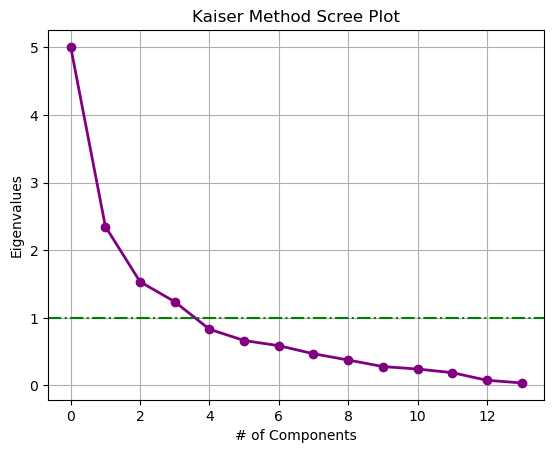

In [37]:
var = pca_train.explained_variance_
comp = np.arange(pca_train.n_components_)

plt.plot(comp,
         var,
         'o-',
         linewidth=2,
         color='purple')
plt.title('Kaiser Method Scree Plot')
plt.xlabel('# of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y = 1, color='green', linestyle='dashdot')
plt.grid()
plt.show()

Based on the Kaiser Scree plot, four principal components are the optimal amount because only four components have eigenvalues above 1.

In [38]:
pca_train = PCA(n_components=4)
X_train_PC = pca_train.fit_transform(X_train)

In [39]:
#Create loading matrix
X_matrix = pd.DataFrame(X_train_PC, columns = ['PC1','PC2','PC3', 'PC4'])
X_matrix['Intercept'] = 1
X_matrix

,PC1,PC2,PC3,PC4,Intercept
0,0.407967,0.919584,-0.952899,-0.013169,1
1,-3.766757,-0.071979,0.013070,-0.445614,1
2,-2.907523,0.001727,-0.589097,-0.299234,1
3,-0.611085,0.827644,0.804987,0.748734,1
4,0.029339,-1.934031,-0.122870,-0.570537,1
...,...,...,...,...,...
17285,-2.818125,-0.014909,-0.493500,-0.229376,1
17286,2.103978,-1.768733,-0.678998,-0.239812,1
17287,0.128638,-2.170493,-0.146076,-0.165539,1
17288,-5.039142,0.693680,-2.135890,-1.472242,1


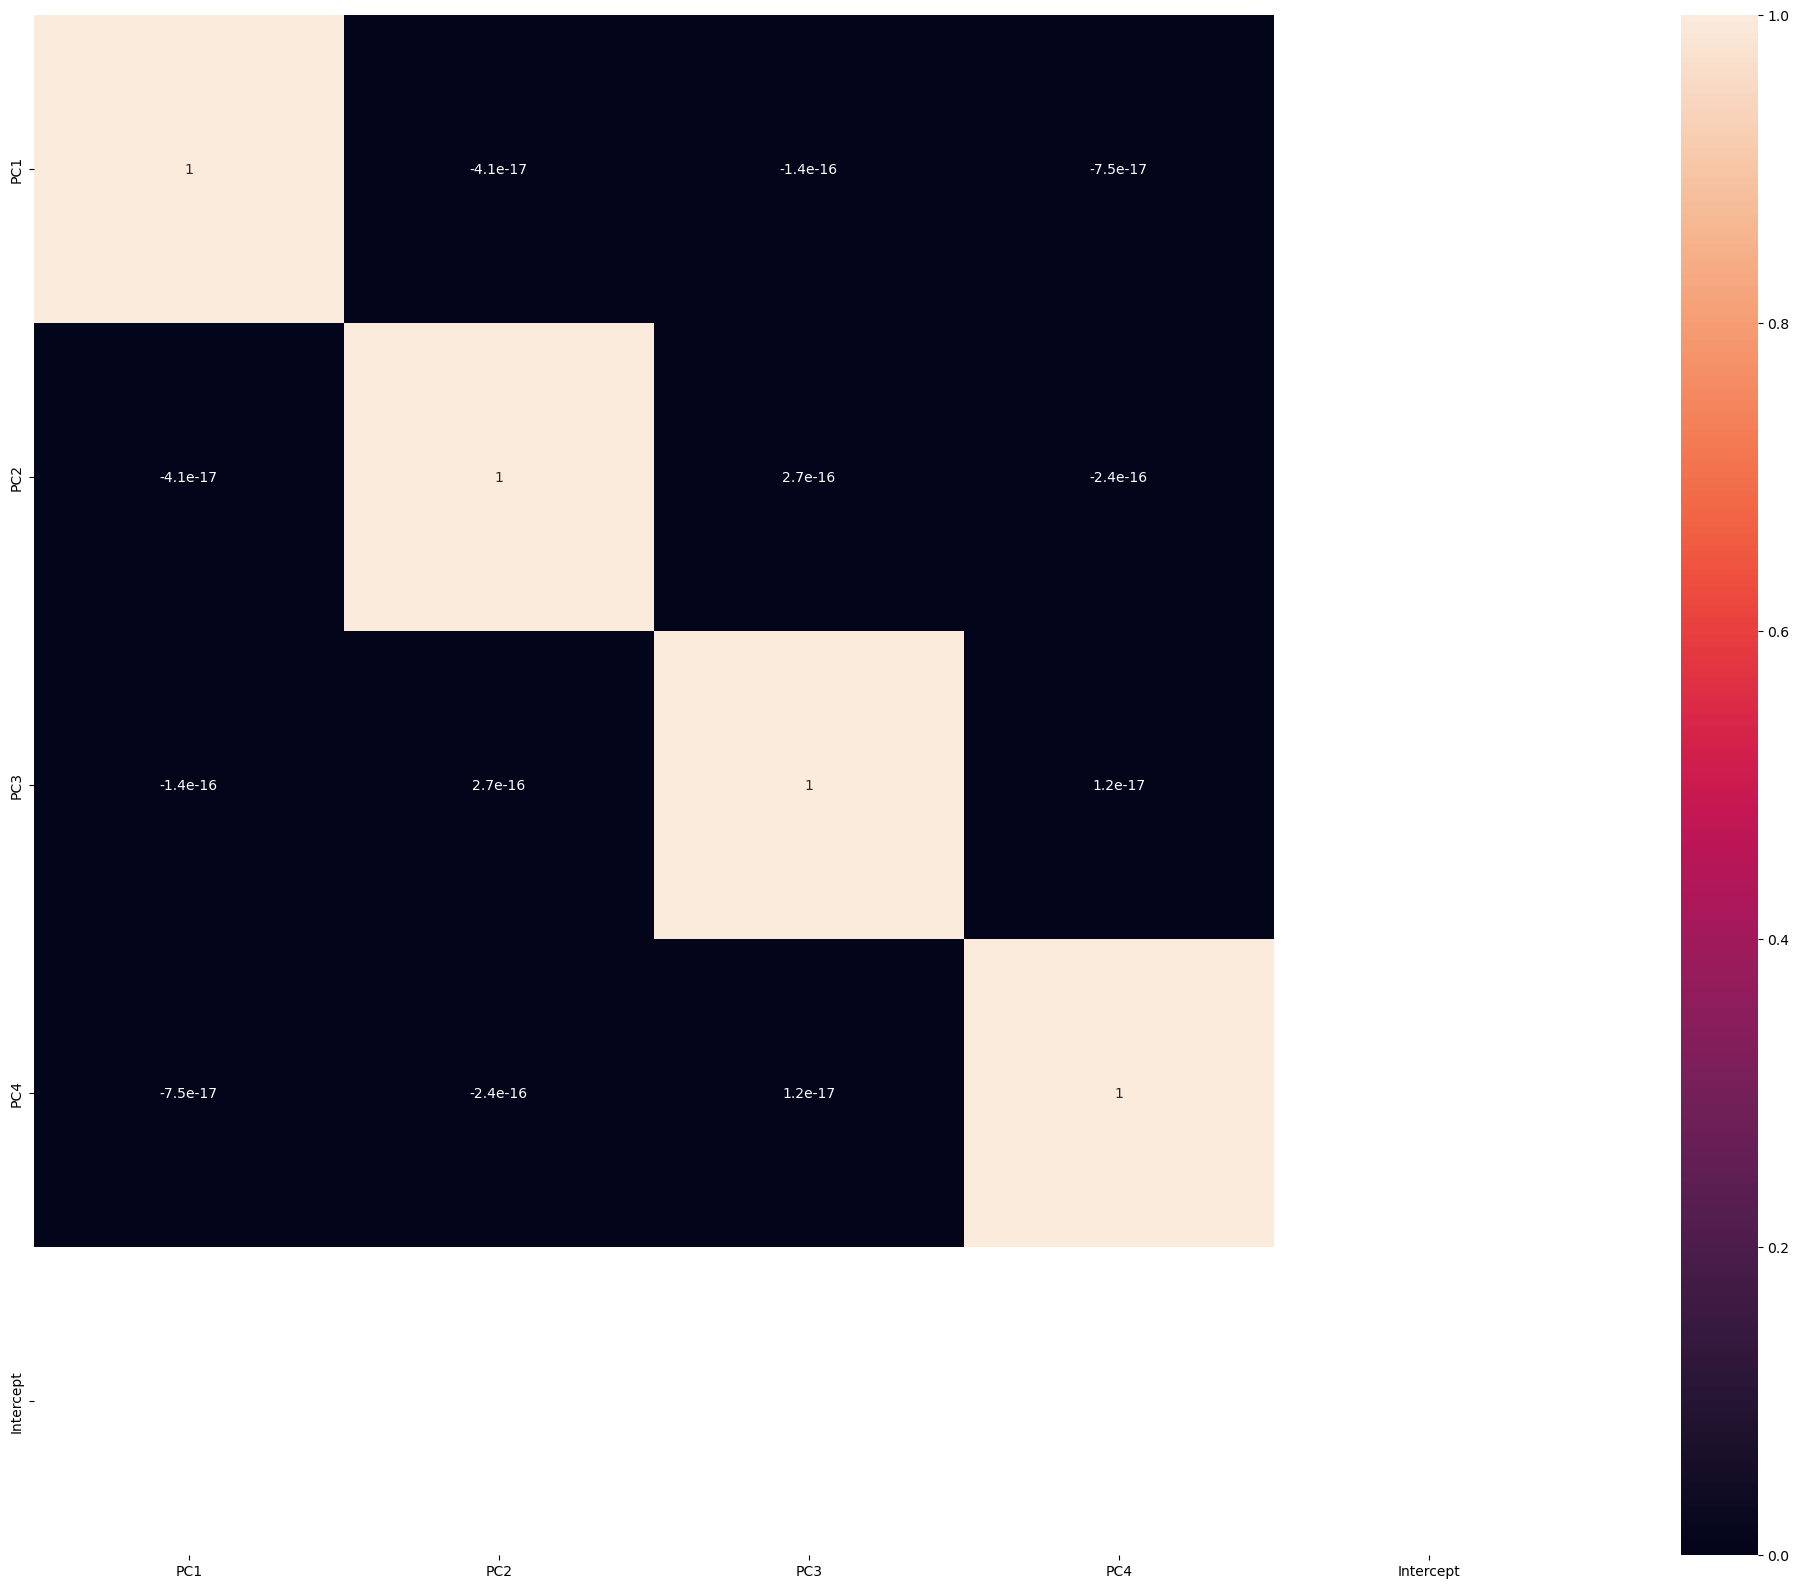

In [40]:
#Create heatmap to check for multicollinearity
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111)
sns.heatmap(X_matrix.corr(), annot=True);

In [41]:
#Fit and transform the standardized X_test data
pca_test = PCA(n_components=4)
X_test_PC = pca_test.fit_transform(X_test)

In [42]:
#Create loading matrix
#Create loading matrix
X_test_matrix = pd.DataFrame(X_test_PC, columns = ['PC1','PC2','PC3','PC4'])
X_test_matrix['Intercept'] = 1
X_test_matrix

,PC1,PC2,PC3,PC4,Intercept
0,0.923927,-0.592308,-0.418175,-0.108821,1
1,1.420664,1.214460,1.053987,-2.738892,1
2,4.544134,-0.673692,0.266158,1.149789,1
3,5.798023,-0.600910,-0.011156,1.470585,1
4,1.443031,-2.081997,-0.154032,0.449484,1
...,...,...,...,...,...
4318,-2.135511,0.602114,-0.222214,-0.007431,1
4319,1.377703,-2.460580,0.043396,0.271258,1
4320,1.395548,-2.009185,-0.114179,0.048482,1
4321,0.231997,0.649902,-0.625610,-0.276076,1


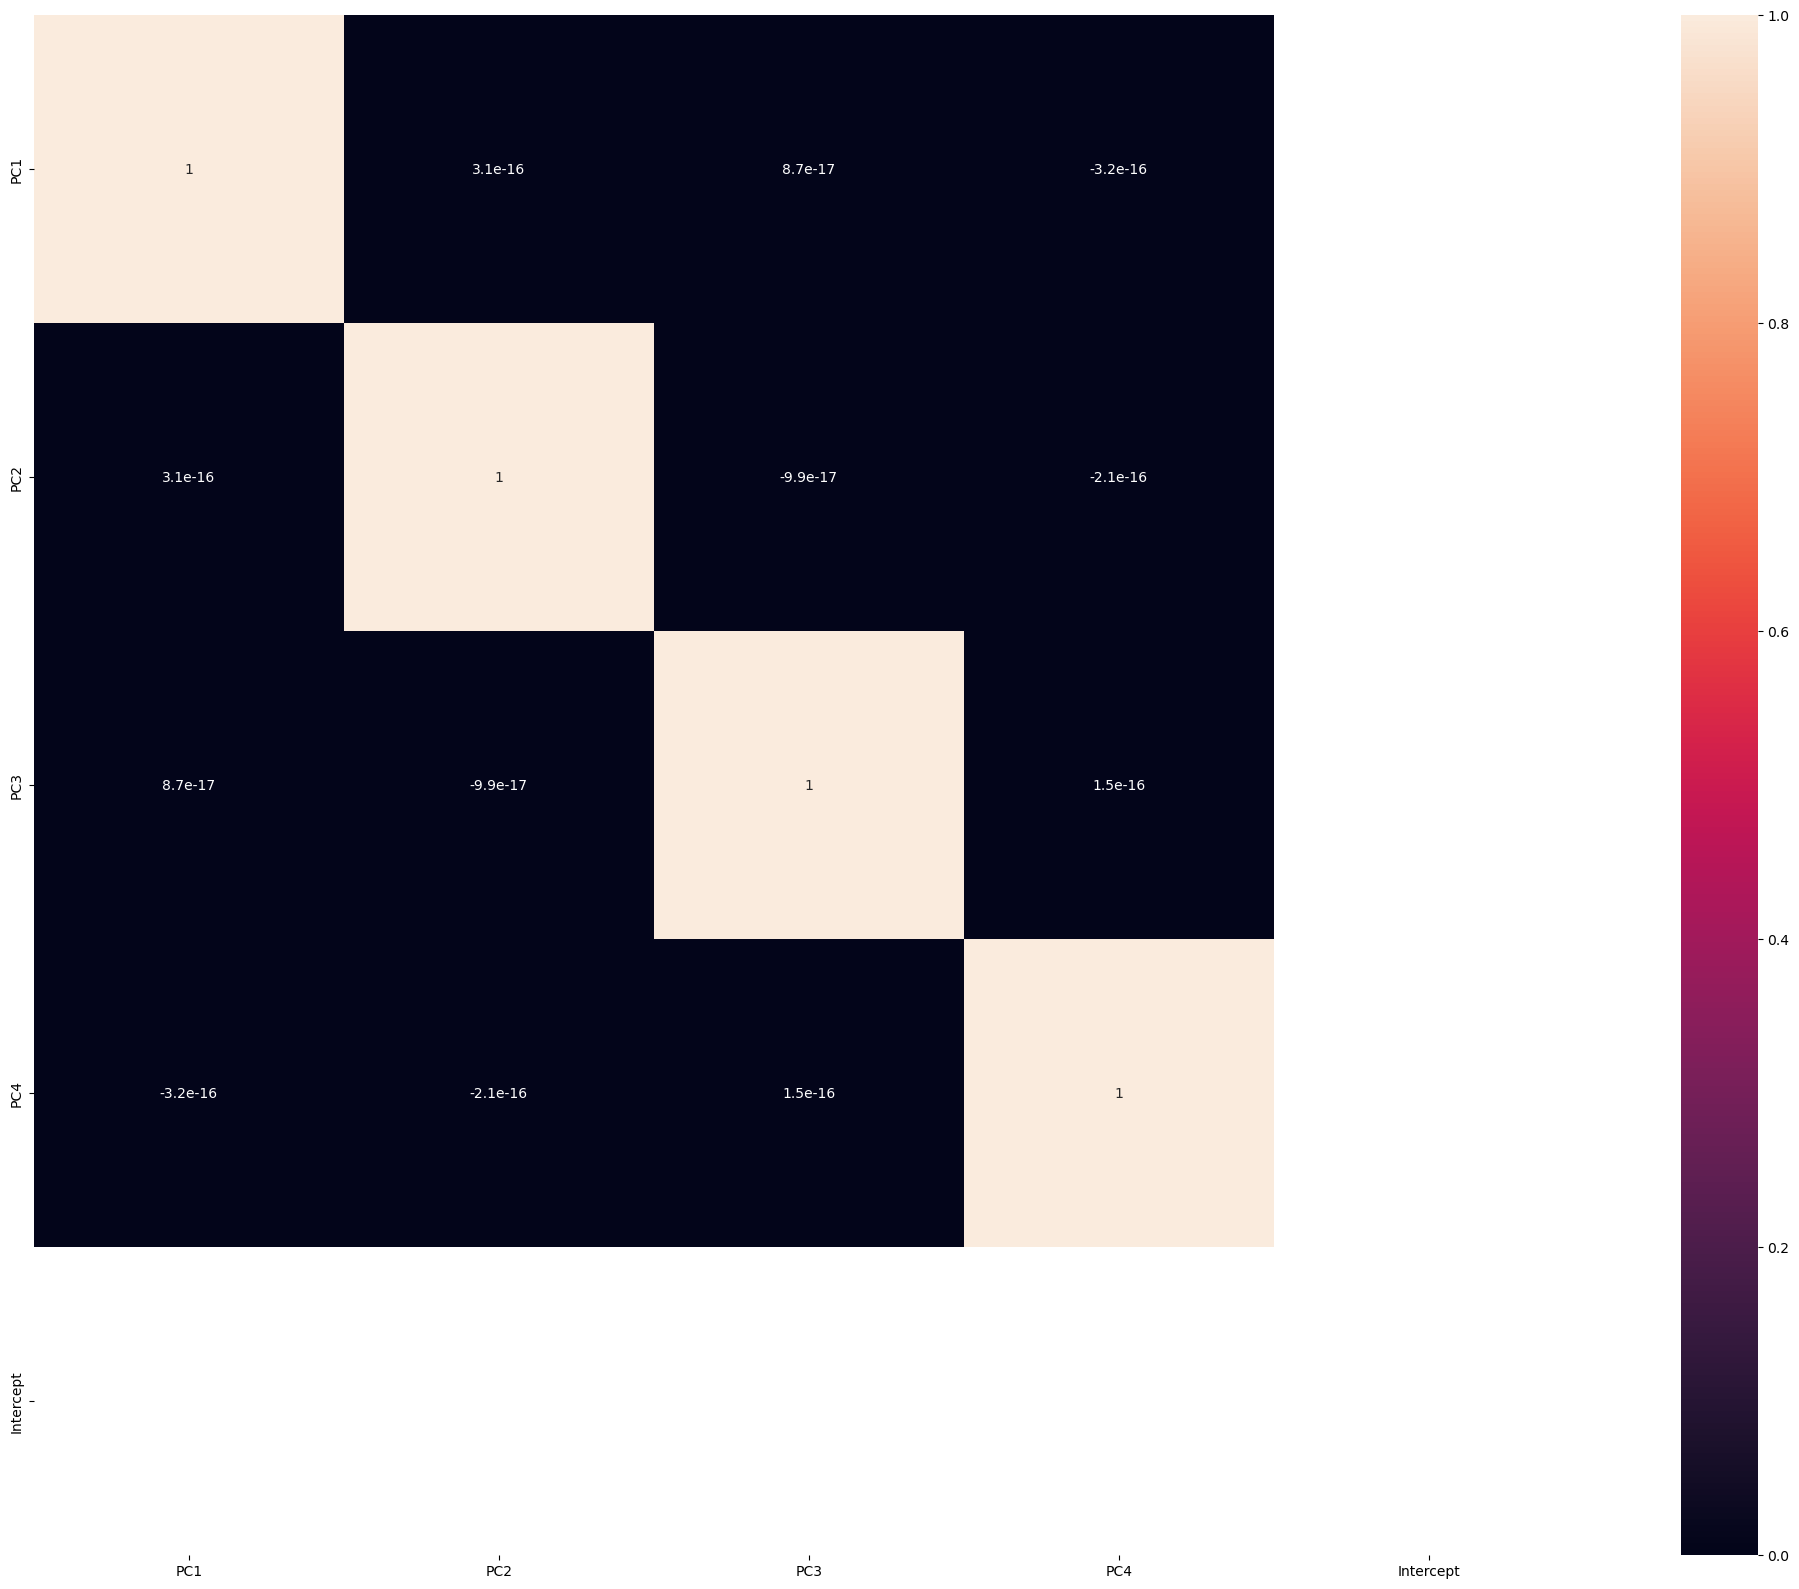

In [43]:
#Create heatmap to check for multicollinearity
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111)
sns.heatmap(X_test_matrix.corr(), annot=True);

After completing PCA on the dataset, the heatmap shows the reduction in multicollinearity that is expected. The above heatmaps show that the multicollinearity between principal components is not there.

### PCA Linear Regression Model

In [44]:
#Create and fit the PCA regression model
model_pca = sm.OLS(y_train, X_train_PC).fit()
print(model_pca.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.533
Model:                            OLS   Adj. R-squared (uncentered):              0.533
Method:                 Least Squares   F-statistic:                              4927.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):                        0.00
Time:                        09:12:23   Log-Likelihood:                         -17895.
No. Observations:               17290   AIC:                                  3.580e+04
Df Residuals:                   17286   BIC:                                  3.583e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [45]:
#Predicition data for the model using the testing data
y_pred_opt = model_pca.predict(X_test_PC)

In [46]:
#Evaluation metrics for the model to determine functionality

#Mean Squared Error
print("The Mean Squared Error for the model is:\n", mean_squared_error(y_test, y_pred_opt),"\n")

The Mean Squared Error for the model is:
 0.4769143128663585 



### Data Summary and Implications <a class="anchor" id="Part5"></a>

### Summary of Implications

The null hypothesis for this project was:

**A predictive Multiple Linear Regression model cannot be made from the dataset to determine which characteristic impact home sales price.**	

The alternate hypothesis for the project was:

**A predictive Multiple Linear Regression model can be constructed and accurately determine which home characteristics impact home sales price with a model accuracy > 65%.**

From the Multiple Linear Regression model, we learn that there is a relationship between the price of a home and its characteristics. It was discovered that the Grade of a house was the characteristic that affected home price the most, with the square footage of neighboring homes being the second characteristic with the most effect. This shows that large homes in neighborhoods with better build quality will generally sell at a higher price than houses that are smaller and less well-built. I had assumed the square footage of a house would have a greater impact than it does, but from the model above we can see that the size of homes in the neighborhood is a more important characteristic in determining home sales price than the individual home's square footage.

It was also determined that applying PCA to this specific dataset was more of a hinderance than a help. The R-squared and Adjusted R-squared values went down while the Mean Squared Error value increased. This shows that the PCA caused poor fitting in the model and that the predictions of the model were worse than in the initial model. The reduction in dimensionality was not beneficial for this model and instead caused the model to be less reliable and less optimized.

One limitation of the analysis is that the data gathered is specifically for Kansas City Missouri. Because of the restraints on the data, it is unlikely that this analysis would be accurate for any other location. Based on the results that were seen and the limitations of the data, I would recommend finding an updated datasource that contains housing data from all over the United States. With this new data, the model could be updated and would give more accurate predictions for the housing market now throughout the entirety of the U.S. instead of limiting the findings to just one city.

One recommended course of action for the project is to try to optimize the model. Industry standard for a good accuracy score is 70% and the model above is just below that. Optimization tools could be implemented such as cross validation to attempt to increase the accuracy of the initial model which would increase the accuracy of the prediction.

There are some things that would be beneficial to continue analysis on this data. The original dataset contains latitude and longitude data which would make creating a k-means cluster analysis very easy. Using the latitude, longitude, and price data a cluster analysis could be performed that would show which areas in Kansas City have homes that tend to sell at a higher price point and those that sell at a lower price point. This analysis would be beneficial for companies in determining if a home would keep its value and sell for more or if it is in a more rundown area with homes that tend to sell for less.

Another analysis that would be beneficial on this dataset is a time series analysis based on the date column. This analysis would be a good way to determine if home prices in Kansas City are increasing or decreasing over the two year period and to get a prediciton of future home prices. This analysis would benefit realtors and real estate companies by giving them the ability to predict future market trends which would give them an upper hand in the market.

### In-Text & Code Sources Used

There were no sources used in the text of this notebook.

#### Code Sources
Deepanshi. (2022, 08 26). How to transform features into Normal/Gaussian Distribution. Retrieved from Analytics Vidhya: https://www.analyticsvidhya.com/blog/2021/05/how-to-transform-features-into-normal-gaussian-distribution/


### Professional Communication

Please see the above Jupyter Notebook to determine professional communication.